In [11]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.dpi'] = 150

In [4]:
import arff
data = arff.load(open('../data/SEA.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
df.head()

,attrib1,attrib2,attrib3,class
0,7.308782,4.100808,2.077148,groupB
1,6.588672,7.107396,1.527362,groupB
2,9.398654,9.471949,9.370821,groupB
3,9.139629,1.593396,3.690026,groupB
4,1.159671,7.705359,6.598927,groupB


In [5]:
df.describe()

,attrib1,attrib2,attrib3
count,50000.000000,50000.000000,50000.000000
mean,4.981750,4.989125,5.015161
std,2.879388,2.926067,2.873073
min,0.000171,0.000401,0.000234
25%,2.489788,2.431785,2.532504
50%,4.975611,4.976266,5.019528
75%,7.477420,7.566548,7.462866
max,9.999875,9.999525,9.999515


In [6]:
df.groupby('class')['class'].count()

class
groupA    20289
groupB    29711
Name: class, dtype: int64

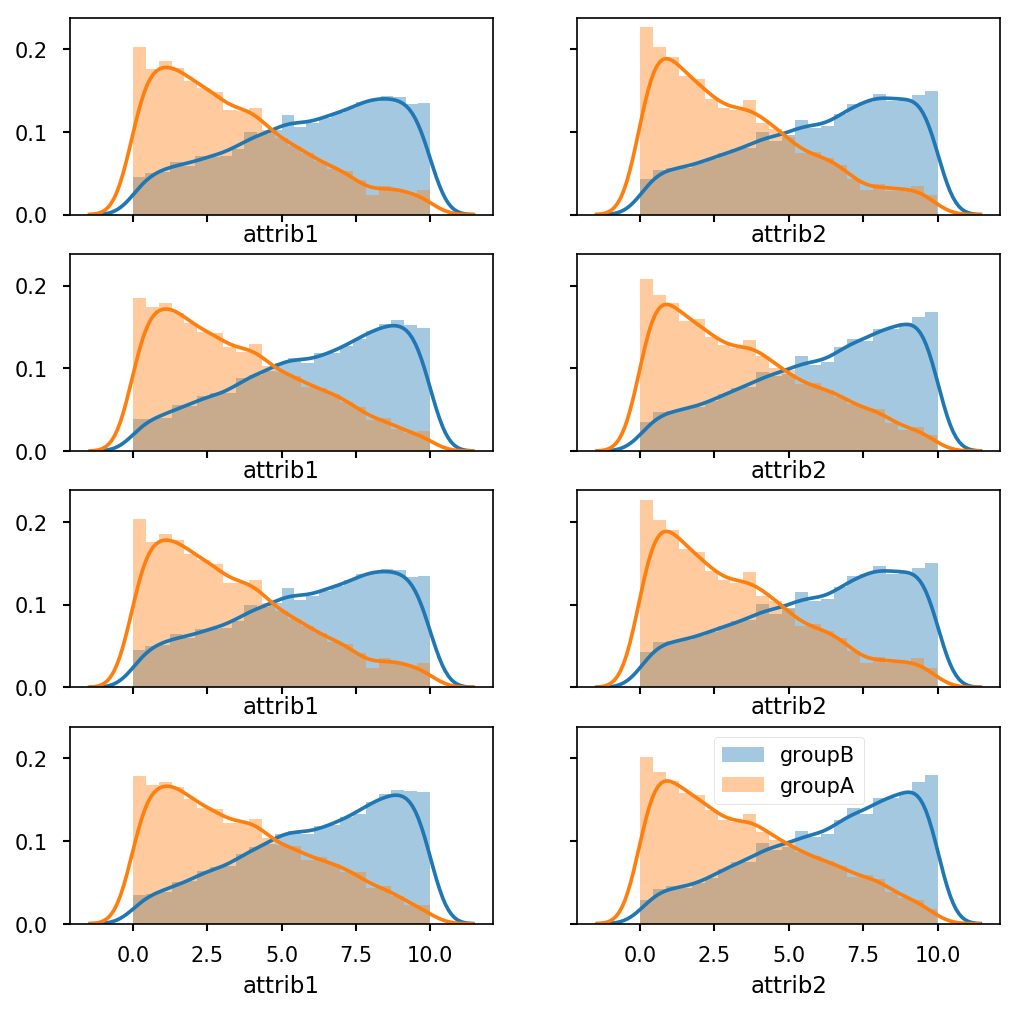

In [23]:
rcParams['figure.figsize'] = (8, 8)
#todo. this does not work. Make it classwise
class_ = 'groupB'
f, axes = plt.subplots(4, 2, sharex=True, sharey=True)

for i in range(2):
    sns.distplot(df[df['class']=='groupB'].loc[:12500,'attrib'+str(i+1)], ax=axes[0,i], label='groupB')
    sns.distplot(df[df['class']=='groupA'].loc[:12500,'attrib'+str(i+1)], ax=axes[0,i], label='groupA')
    sns.distplot(df[df['class']=='groupB'].loc[12500:25000,'attrib'+str(i+1)], ax=axes[1,i], label='groupB')
    sns.distplot(df[df['class']=='groupA'].loc[12500:25000,'attrib'+str(i+1)], ax=axes[1,i], label='groupA')
    sns.distplot(df[df['class']=='groupB'].loc[25000:37500,'attrib'+str(i+1)], ax=axes[2,i], label='groupB')
    sns.distplot(df[df['class']=='groupA'].loc[25000:37500,'attrib'+str(i+1)], ax=axes[2,i], label='groupA')
    sns.distplot(df[df['class']=='groupB'].loc[37500:,'attrib'+str(i+1)], ax=axes[3,i], label='groupB')
    sns.distplot(df[df['class']=='groupA'].loc[37500:,'attrib'+str(i+1)], ax=axes[3,i], label='groupA')

plt.legend()